### Import Libs

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Open CSV File
The source of file is kaggle:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [91]:
churn_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(churn_df.shape)
churn_df.head(20)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Preprocessing

In [107]:
from sklearn.preprocessing import LabelEncoder

# Assuming churn_df is your DataFrame
label_encoder = LabelEncoder()


churn_df = churn_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']]


churn_df['gender'] = label_encoder.fit_transform(churn_df['gender'])
churn_df['Partner'] = label_encoder.fit_transform(churn_df['Partner'])
churn_df['Dependents'] = label_encoder.fit_transform(churn_df['Dependents'])
churn_df['tenure'] = label_encoder.fit_transform(churn_df['tenure'])
churn_df['PhoneService'] = label_encoder.fit_transform(churn_df['PhoneService'])
churn_df['MultipleLines'] = label_encoder.fit_transform(churn_df['MultipleLines'])
churn_df['InternetService'] = label_encoder.fit_transform(churn_df['InternetService'])
churn_df['OnlineSecurity'] = label_encoder.fit_transform(churn_df['OnlineSecurity'])
churn_df['OnlineBackup'] = label_encoder.fit_transform(churn_df['OnlineBackup'])
churn_df['DeviceProtection'] = label_encoder.fit_transform(churn_df['DeviceProtection'])
churn_df['TechSupport'] = label_encoder.fit_transform(churn_df['TechSupport'])
churn_df['StreamingTV'] = label_encoder.fit_transform(churn_df['StreamingTV'])
churn_df['StreamingMovies'] = label_encoder.fit_transform(churn_df['StreamingMovies'])
churn_df['Contract'] = label_encoder.fit_transform(churn_df['Contract'])
churn_df['PaperlessBilling'] = label_encoder.fit_transform(churn_df['PaperlessBilling'])
churn_df['PaymentMethod'] = label_encoder.fit_transform(churn_df['PaymentMethod'])
churn_df['Churn'] = label_encoder.fit_transform(churn_df['Churn'])

churn_df['MonthlyCharges'] = churn_df['MonthlyCharges'].astype('int')
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace('', '0')
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace(' ', '0')
churn_df['TotalCharges'] = churn_df['TotalCharges'].astype('float').round(2)
churn_df['TotalCharges'] = churn_df['TotalCharges'].astype('int')
churn_df['Churn'] = churn_df['Churn'].astype('int')

print(churn_df.shape)
churn_df.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,29,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1889,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,108,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,1840,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,151,1


### Separate X values

In [108]:
X = np.asarray(churn_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges',]])
X[0:5]

array([[   0,    0,    1,    0,    1,    0,    1,    0,    0,    2,    0,
           0,    0,    0,    0,    1,    2,   29,   29],
       [   1,    0,    0,    0,   34,    1,    0,    0,    2,    0,    2,
           0,    0,    0,    1,    0,    3,   56, 1889],
       [   1,    0,    0,    0,    2,    1,    0,    0,    2,    2,    0,
           0,    0,    0,    0,    1,    3,   53,  108],
       [   1,    0,    0,    0,   45,    0,    1,    0,    2,    0,    2,
           2,    0,    0,    1,    0,    0,   42, 1840],
       [   0,    0,    0,    0,    2,    1,    0,    1,    0,    0,    0,
           0,    0,    0,    0,    1,    2,   70,  151]])

### Separate Y value

In [111]:
y = np.asarray(churn_df['Churn'])
y [0:5]

array([0, 0, 1, 0, 1])

### Normalize data

In [112]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.01, -0.44,  1.03, -0.65, -1.28, -3.05,  0.06, -1.18, -0.92,
         1.24, -1.03, -0.93, -1.11, -1.12, -0.83,  0.83,  0.4 , -1.17,
        -0.99],
       [ 0.99, -0.44, -0.97, -0.65,  0.07,  0.33, -0.99, -1.18,  1.41,
        -1.03,  1.25, -0.93, -1.11, -1.12,  0.37, -1.21,  1.33, -0.28,
        -0.17],
       [ 0.99, -0.44, -0.97, -0.65, -1.24,  0.33, -0.99, -1.18,  1.41,
         1.24, -1.03, -0.93, -1.11, -1.12, -0.83,  0.83,  1.33, -0.38,
        -0.96],
       [ 0.99, -0.44, -0.97, -0.65,  0.51, -3.05,  0.06, -1.18,  1.41,
        -1.03,  1.25,  1.4 , -1.11, -1.12,  0.37, -1.21, -1.47, -0.74,
        -0.19],
       [-1.01, -0.44, -0.97, -0.65, -1.24,  0.33, -0.99,  0.17, -0.92,
        -1.03, -1.03, -0.93, -1.11, -1.12, -0.83,  0.83,  0.4 ,  0.19,
        -0.94]])

### Split data for tran and test

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 19) (5634,)
Test set: (1409, 19) (1409,)


### Modeling (Logistic Regression with Scikit-learn)

In [98]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

### Predict

In [99]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

### Probability

In [100]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.76, 0.24],
       [0.72, 0.28],
       [0.79, 0.21],
       ...,
       [0.93, 0.07],
       [0.94, 0.06],
       [0.95, 0.05]])

### Evaluation

In [120]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.742998352553542

### Create chart

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[195 179]
 [133 902]]


Confusion matrix, without normalization
[[195 179]
 [133 902]]


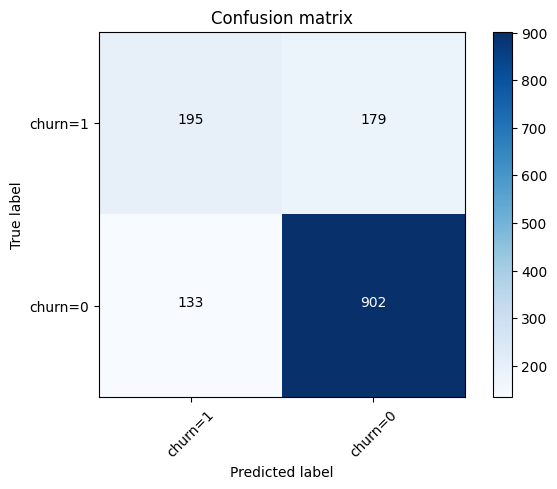

In [124]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [128]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.59      0.52      0.56       374

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.78      0.77      1409


In [127]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.44698753875704444